In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
from separation_en_caractères import separe_en_caracteres
from separation_en_lignes import separe_en_lignes

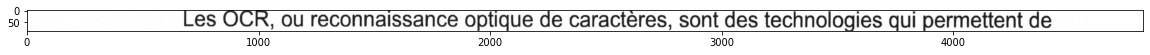

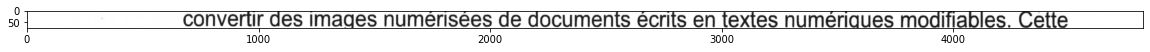

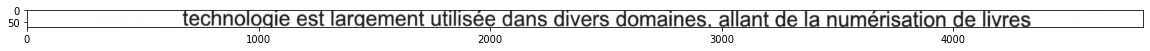

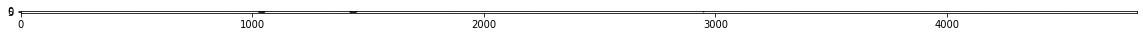

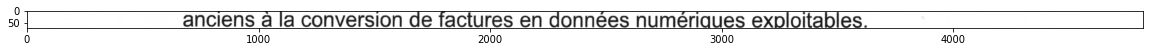

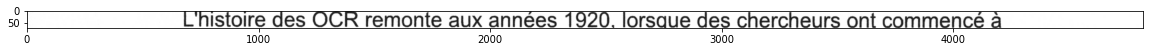

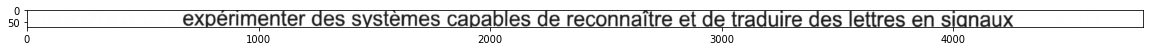

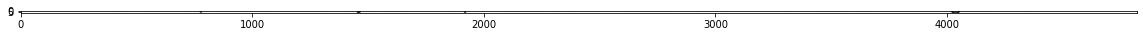

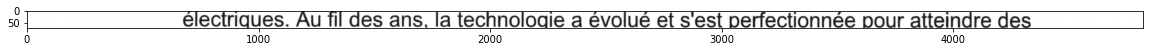

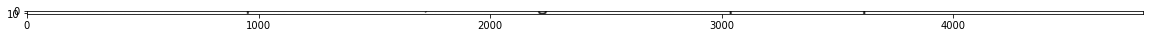

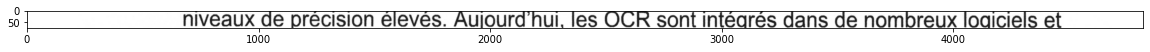

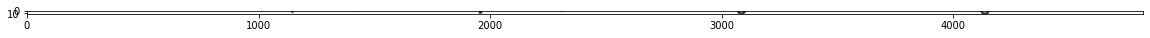

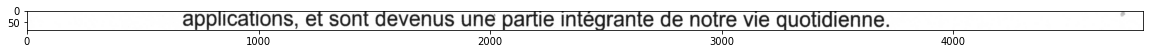

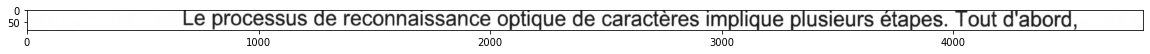

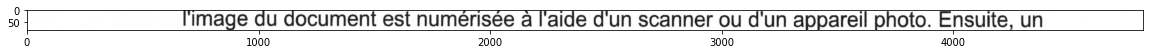

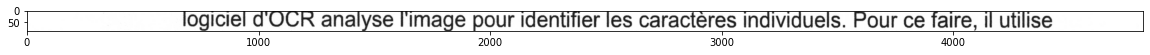

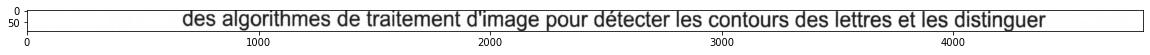

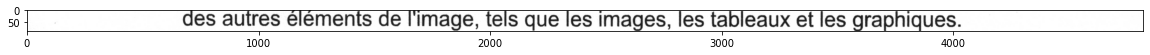

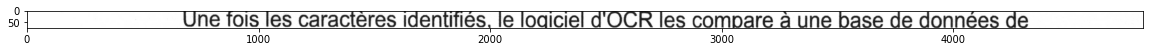

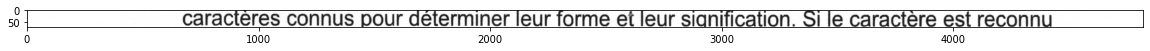

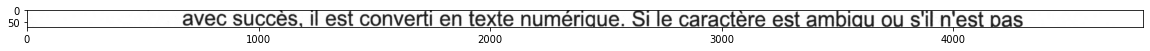

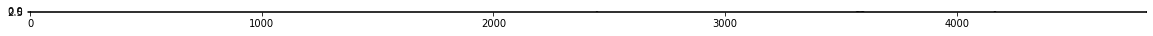

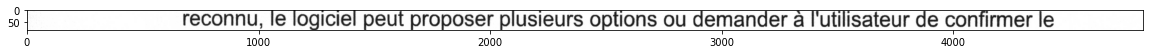

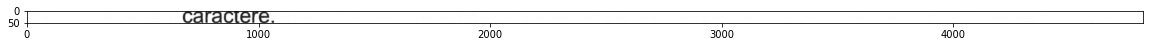

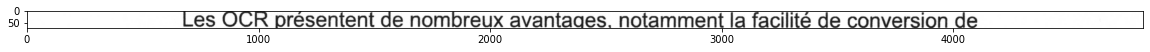

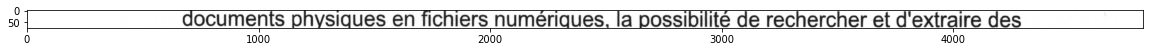

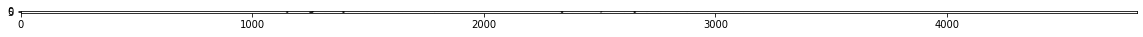

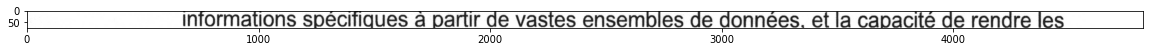

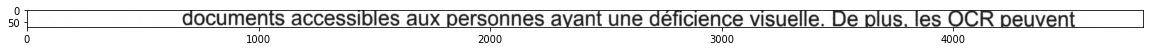

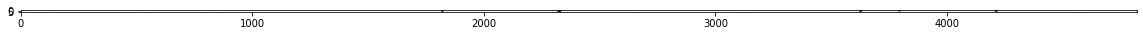

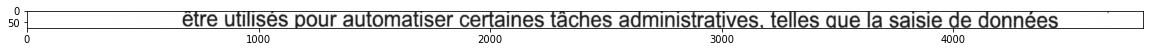

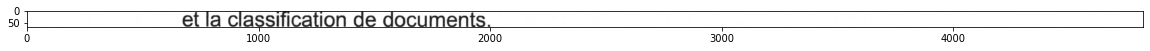

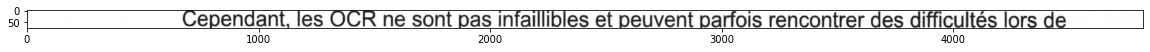

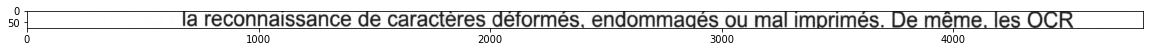

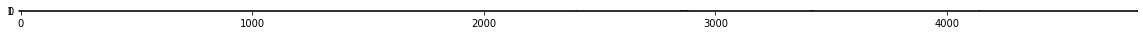

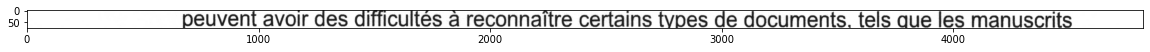

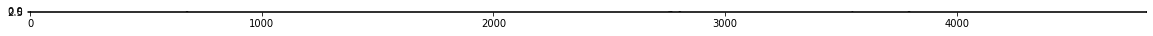

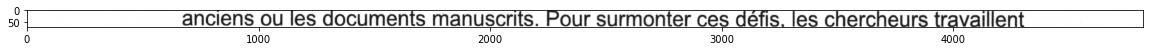

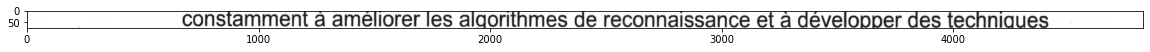

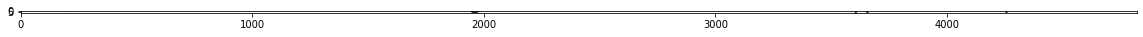

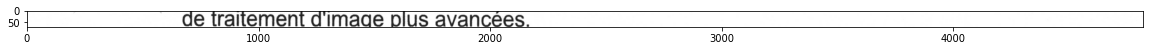

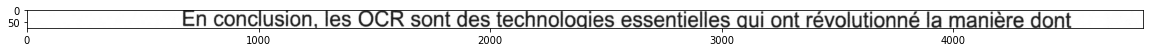

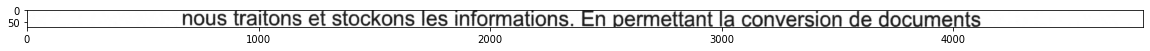

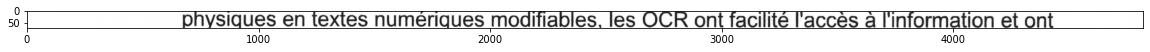

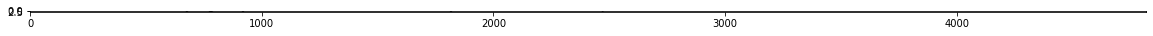

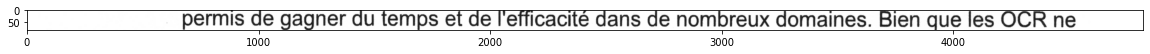

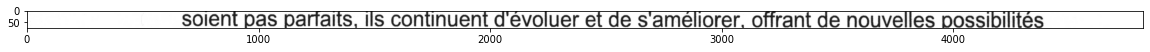

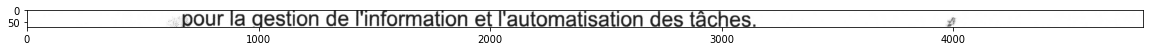

'\nranges = separe_en_caracteres(image_binary, indices_debut_fin_ligne)\n\nfor elt in ranges :\n    plt.figure(figsize=(20,10))\n    plt.imshow(image[indices_debut_fin_ligne[0]:indices_debut_fin_ligne[1], elt[0]:elt[1]])\n    plt.show()\n'

In [2]:
image = cv2.imread('scan.bmp')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
(thresh, image_binary) = cv2.threshold(gray, 150, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)

indices_lignes = separe_en_lignes(image_binary)

for t in indices_lignes :   
        plt.figure(figsize=(20,10))
        plt.imshow(image[t[0]:t[1]])
        plt.show()


        
"""
ranges = separe_en_caracteres(image_binary, indices_debut_fin_ligne)

for elt in ranges :
    plt.figure(figsize=(20,10))
    plt.imshow(image[indices_debut_fin_ligne[0]:indices_debut_fin_ligne[1], elt[0]:elt[1]])
    plt.show()
"""

In [3]:
print(len(indices_lignes))

48


In [13]:
# Listes contenant les indices y des lignes de pixels noirs et blanches (en fonction de leurs taux)
liste_indices_pixels_blancs = []
liste_indices_pixels_noirs = []

for i in range(len(image_binary)) :
    ligne_pixel = image_binary[i]
    # Calcul du nombre de pixels blancs dans une ligne
    somme = 0
    for j in image_binary[i] :
        if j == 255 : 
            somme += 1
        else : 
            somme += 0
    # Calcul du taux de pixels blancs dans la ligne
    taux_de_blancs = somme/len(ligne_pixel)
    # Si le taux est > a un certain nombre (0.985 de base) on considère que cette ligne ne contient pas de texte
    if taux_de_blancs >= 0.99 : #Quasi que des blancs
        liste_indices_pixels_blancs.append(i)
    else : 
        liste_indices_pixels_noirs.append(i)

#print(liste_indices_pixels_noirs)


"""
# On regarde dans la liste des indices des pixels blancs et si on observe un 'saut', c'est que des lignes de pixels de texte sont là
# On stocke donc ces indices, qui correspondent aux indices des lignes de pixel contenant du texte
indices_lignes = []
for i in range(1, len(liste_indices_pixels_blancs)) :
    if liste_indices_pixels_blancs[i] != liste_indices_pixels_blancs[i-1]+1 :
        indices_lignes.append((liste_indices_pixels_blancs[i-1], liste_indices_pixels_blancs[i])) #Améliorer le +-10

print(indices_lignes)
"""


"\n# On regarde dans la liste des indices des pixels blancs et si on observe un 'saut', c'est que des lignes de pixels de texte sont là\n# On stocke donc ces indices, qui correspondent aux indices des lignes de pixel contenant du texte\nindices_lignes = []\nfor i in range(1, len(liste_indices_pixels_blancs)) :\n    if liste_indices_pixels_blancs[i] != liste_indices_pixels_blancs[i-1]+1 :\n        indices_lignes.append((liste_indices_pixels_blancs[i-1], liste_indices_pixels_blancs[i])) #Améliorer le +-10\n\nprint(indices_lignes)\n"

In [14]:
print(liste_indices_pixels_noirs)
print(len(liste_indices_pixels_noirs))

[412, 413, 414, 415, 416, 417, 418, 419, 420, 421, 422, 423, 424, 425, 426, 427, 428, 429, 430, 431, 432, 433, 434, 435, 436, 437, 438, 439, 440, 441, 442, 443, 444, 445, 446, 447, 448, 449, 450, 451, 452, 453, 454, 455, 456, 457, 458, 459, 460, 461, 462, 463, 464, 465, 466, 467, 468, 469, 470, 471, 472, 473, 474, 475, 476, 477, 478, 479, 480, 481, 482, 483, 484, 485, 486, 487, 488, 489, 490, 491, 492, 493, 494, 495, 496, 497, 498, 521, 522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537, 538, 539, 540, 541, 542, 543, 544, 545, 546, 547, 548, 549, 550, 551, 552, 553, 554, 555, 556, 557, 558, 559, 560, 561, 562, 563, 564, 565, 566, 567, 568, 569, 570, 571, 572, 573, 574, 575, 576, 577, 578, 579, 580, 581, 582, 583, 584, 585, 586, 587, 588, 589, 590, 591, 592, 593, 626, 627, 628, 629, 630, 631, 632, 633, 634, 635, 636, 637, 638, 639, 640, 641, 642, 643, 644, 645, 646, 647, 648, 649, 650, 651, 652, 653, 654, 655, 656, 657, 658, 659, 660, 661, 662, 663, 664, 665,

In [15]:
d = np.diff(liste_indices_pixels_noirs)
print(d)

espaces = [val for val in d if val > 1]
print(espaces)
print(len(espaces))

[1 1 1 ... 1 1 1]
[23, 33, 5, 24, 305, 37, 6, 22, 2, 22, 3, 21, 297, 21, 22, 23, 20, 290, 38, 35, 11, 23, 38, 314, 34, 2, 23, 37, 6, 23, 34, 310, 34, 8, 25, 6, 26, 35, 6, 21, 310, 34, 36, 3, 28, 22, 33]
47


In [16]:
indices_lignes = []
for i in range(1, len(liste_indices_pixels_blancs)) :
    if liste_indices_pixels_blancs[i] != liste_indices_pixels_blancs[i-1]+1 :
        indices_lignes.append((liste_indices_pixels_blancs[i-1], liste_indices_pixels_blancs[i])) #Améliorer le +-10

print(indices_lignes)
print(len(indices_lignes))

[(411, 499), (520, 594), (625, 697), (700, 709), (731, 804), (1107, 1180), (1215, 1287), (1291, 1300), (1320, 1393), (1393, 1405), (1425, 1499), (1500, 1514), (1533, 1616), (1911, 1995), (2014, 2098), (2118, 2205), (2226, 2314), (2332, 2421), (2709, 2783), (2819, 2890), (2923, 2995), (3004, 3008), (3029, 3113), (3149, 3200), (3512, 3585), (3617, 3692), (3692, 3700), (3721, 3795), (3830, 3902), (3906, 3912), (3933, 4007), (4039, 4108), (4416, 4491), (4523, 4597), (4603, 4605), (4628, 4703), (4707, 4711), (4735, 4807), (4840, 4914), (4918, 4926), (4945, 5015), (5323, 5399), (5431, 5503), (5537, 5610), (5611, 5616), (5642, 5726), (5746, 5820), (5851, 5923)]
48


In [17]:
liste_hauteurs = []
for elt in indices_lignes :
    liste_hauteurs.append((elt[1]-elt[0]))

print(liste_hauteurs)
print(len(liste_hauteurs))

[88, 74, 72, 9, 73, 73, 72, 9, 73, 12, 74, 14, 83, 84, 84, 87, 88, 89, 74, 71, 72, 4, 84, 51, 73, 75, 8, 74, 72, 6, 74, 69, 75, 74, 2, 75, 4, 72, 74, 8, 70, 76, 72, 73, 5, 84, 74, 72]
48
